**掛載雲端硬碟**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**import 套件**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as plt_font
from IPython.display import display, clear_output
twfont1=plt_font.FontProperties(fname="drive/My Drive/DL_CLASS/kaiu.ttf")

**鳶尾花特徵資料集和分類標示資料集**

In [ ]:
#data_x1為花萼長度
data_x1 = np.array([5.1 ,5.5 ,4.9 ,6.5 ,4.7 ,5.7 ,4.6 ,6.3 ,5.0 ,4.9 ,5.4 ,6.6 ,4.6 ,5.2 ,5.0 ,5.0 ,4.4 ,5.9 ,4.9 ,6.0 ,5.4 ,6.1 ,4.8 ,5.6 ,4.8 ,6.7 ,4.3 ,5.6 ,5.8 ,5.8 ,5.7 ,6.2 ,5.4 ,5.6 ,5.1 ,5.9 ,5.7 ,6.1 ,5.1 ,6.3 ,5.4 ,6.1 ,5.1 ,6.4 ,4.6 ,6.6 ,5.1 ,6.8 ,4.8 ,6.7 ,5.0 ,6.0 ,5.0 ,5.7 ,5.2 ,5.5 ,5.2 ,5.5 ,4.7 ,5.8 ,4.8 ,6.0 ,5.4 ,7.0 ,6.4 ,6.9])
#data_x1為花萼寬度
data_x2 = np.array([3.5 ,2.3 ,3.0 ,2.8 ,3.2 ,2.8 ,3.1 ,3.3 ,3.6 ,2.4 ,3.9 ,2.9 ,3.4 ,2.7 ,3.4 ,2.0 ,2.9 ,3.0 ,3.1 ,2.2 ,3.7 ,2.9 ,3.4 ,2.9 ,3.0 ,3.1 ,3.0 ,3.0 ,4.0 ,2.7 ,4.4 ,2.2 ,3.9 ,2.5 ,3.5 ,3.2 ,3.8 ,2.8 ,3.8 ,2.5 ,3.4 ,2.8 ,3.7 ,2.9 ,3.6 ,3.0 ,3.3 ,2.8 ,3.4 ,3.0 ,3.0 ,2.9 ,3.4 ,2.6 ,3.5 ,2.4 ,3.4 ,2.4 ,3.2 ,2.7 ,3.1 ,2.7 ,3.4 ,3.2 ,3.2 ,3.1])
#標示+1為山鳶尾(setosa)、標示-1為雜色鳶尾(versicolor)
data_y  = np.array([+1  ,0   ,+1  ,0   ,+1  ,0   ,+1  ,0   ,+1  ,0   ,+1  ,0   ,+1  ,0   ,+1  ,0   ,+1  ,0   ,+1  ,0   ,+1  ,0   ,+1  ,0   ,+1  ,0   ,+1  ,0   ,+1  ,0   ,+1  ,0   ,+1  ,0   ,+1  ,0   ,+1  ,0   ,+1  ,0   ,+1  ,0   ,+1  ,0   ,+1  ,0   ,+1  ,0   ,+1  ,0   ,+1  ,0   ,+1  ,0   ,+1  ,0   ,+1  ,0   ,+1  ,0   ,+1  ,0   ,+1  ,0   ,0   ,0  ])

**特徵縮放**

In [ ]:
def FeatureScaling(data):
    return (data-data.mean())/data.std()

**導入資料**

In [ ]:
#訓練資料集50筆
train_x1=FeatureScaling(data_x1)[:50]
train_x2=FeatureScaling(data_x2)[:50]
train_y=data_y[:50]
#驗證資料集16筆
valid_x1=FeatureScaling(data_x1)[50:]
valid_x2=FeatureScaling(data_x2)[50:]
valid_y=data_y[50:]

**產生特徵資料x矩陣和實際分類y矩陣**



In [ ]:
#垂直堆疊1，x1，x2，再轉置組成X矩陣
def Xmatrix(x1,x2):
  return np.vstack([x1,x1**2,x1**3,x2]).T

#將訓練集資料和驗證集資料的自變數x轉成[n列m行]矩陣
mtx_train_x=Xmatrix(train_x1,train_x2)
mtx_valid_x=Xmatrix(valid_x1,valid_x2)
#將訓練集資料和驗證集資料的自變數x轉成[n列1行]矩陣
mtx_train_y=train_y.reshape((-1,1))
mtx_valid_y=valid_y.reshape((-1,1))

**隨機初始化權重矩陣**

In [ ]:
#亂數初始化迴歸係數為[2列1行]矩陣
W=np.random.rand(4).reshape((4,1))
B=np.random.rand(1).reshape((1,1))

**定義線性累加函數**

In [ ]:
def Sumfun(x):
  return np.dot(x, W)+B

**定義激活函數與分類**

In [ ]:
def Actfun(z):
    return 1/(1+np.exp(-z))

def Classify(y_hat):
    return np.around(y_hat)

**設定學習率和權重更新次數**

In [ ]:
ETA=0.005
Step_Loss=[]
Step_W=[]
Step_B=[]

**開始訓練模型**

In [ ]:
for epoch in range(50000):
    z=Sumfun(mtx_train_x)
    y_hat=Actfun(z)
    W=W-ETA*np.dot(mtx_train_x.T,y_hat-mtx_train_y)
    B=B-ETA*np.sum(y_hat-mtx_train_y)

    if epoch%50==49:
        Loss=np.sum(-mtx_train_y*np.log(y_hat)-(1-mtx_train_y)*np.log(1-y_hat))
        print("訓練次數:",epoch+1,"偏值:",B[0],"權重w1:",W[0],"權重w2:",[1],"權重w3:",W[2],"權重w4:",W[3],"損失函數:",Loss)
        Step_Loss.append(Loss)
        Step_W.append(W)
        Step_B.append(B)
        clear_output(wait=True)

訓練次數: 50000 偏值: [-3.19152229] 權重w1: [-7.31390723] 權重w2: [1] 權重w3: [-4.31406285] 權重w4: [10.00798117] 損失函數: nan


**畫圖檢查模型訓練結果**

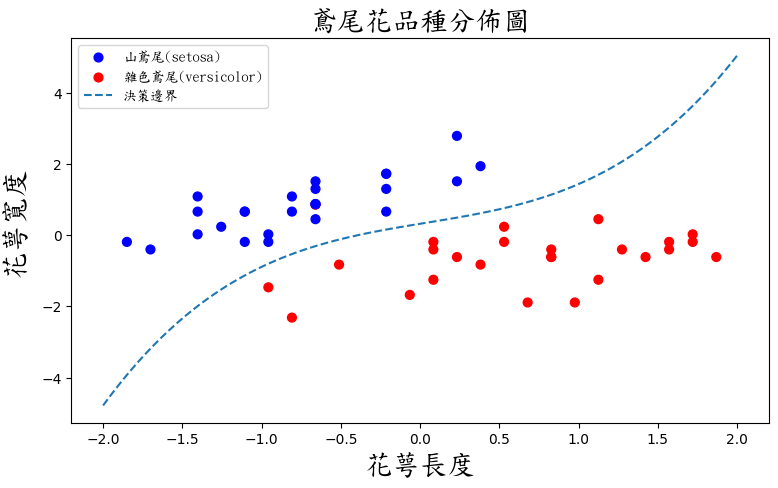

In [ ]:
x1 = np.linspace(-2, 2, 100)
plt.figure(figsize=(9,5))
plt.title("鳶尾花品種分佈圖",fontproperties=twfont1,fontsize=20)
plt.xlabel("花萼長度",fontproperties=twfont1,fontsize=20)
plt.ylabel("花萼寬度",fontproperties=twfont1,fontsize=20)
plt.scatter(train_x1[0],train_x2[0],c="b",s=40,label="山鳶尾(setosa)")
plt.scatter(train_x1[0],train_x2[0],c="r",s=40,label="雜色鳶尾(versicolor)")
plt.scatter(train_x1,train_x2,c=["b" if i==1 else "r" for i in train_y ], s=40)
plt.plot(x1,-(W[0]/W[3])*x1-(W[1]/W[3])*x1**2-(W[2]/W[3])*x1**3-(B[0]/W[3]), linestyle='dashed',label="決策邊界")
plt.legend(prop=twfont1)
plt.show()

**動畫檢查模型訓練結果**

偏值: [-2.57720142] 權重w1: [-5.56056046] 權重w2: [0.48815931] 權重w3: [-3.6692136] 權重w4: [7.99088649]


KeyboardInterrupt: 

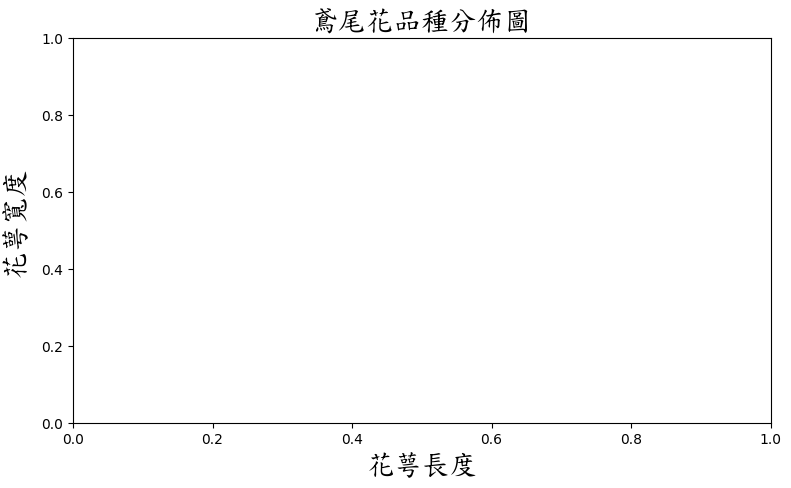

In [ ]:
x1 = np.linspace(-2, 2, 100)
for i in range(len(Step_W)):
    print("偏值:",Step_B[i][0],"權重w1:",Step_W[i][0],"權重w2:",Step_W[i][1],"權重w3:",Step_W[i][2],"權重w4:",Step_W[i][3])
    plt.figure(figsize=(9,5))
    plt.title("鳶尾花品種分佈圖",fontproperties=twfont1,fontsize=20)
    plt.xlabel("花萼長度",fontproperties=twfont1,fontsize=20)
    plt.ylabel("花萼寬度",fontproperties=twfont1,fontsize=20)
    plt.scatter(train_x1[0],train_x2[0],c="b",s=40,label="山鳶尾(setosa)")
    plt.scatter(train_x1[0],train_x2[0],c="r",s=40,label="雜色鳶尾(versicolor)")
    plt.scatter(train_x1,train_x2, c=["b" if i==1 else "r" for i in train_y ], s=40)
    plt.plot(x1,-(Step_W[i][0]/Step_W[i][3])*x1-(Step_W[i][1]/Step_W[i][3])*x1**2-(Step_W[i][2]/Step_W[i][3])*x1**3-(Step_B[i][0]/Step_W[i][3]), linestyle='dashed',label="決策邊界")
    plt.legend(prop=twfont1)
    plt.pause(0.1)
    clear_output(wait=True)

**對於驗證集資料的分類效果**

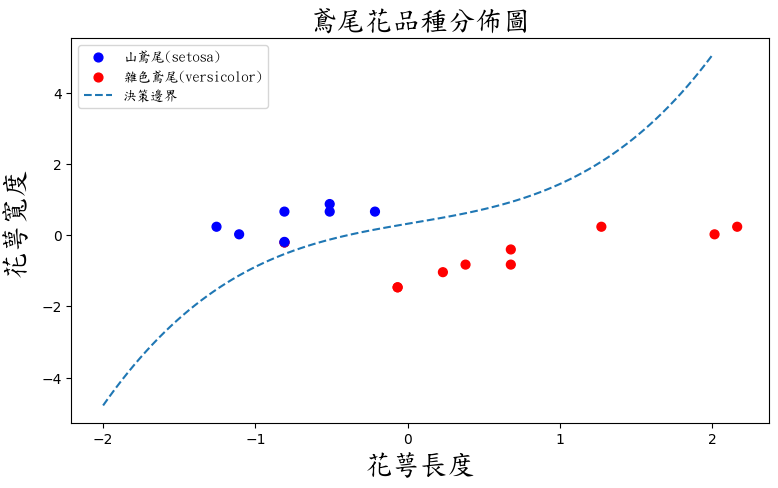

In [ ]:
x1 = np.linspace(-2, 2, 100)
plt.figure(figsize=(9,5))
plt.title("鳶尾花品種分佈圖",fontproperties=twfont1,fontsize=20)
plt.xlabel("花萼長度",fontproperties=twfont1,fontsize=20)
plt.ylabel("花萼寬度",fontproperties=twfont1,fontsize=20)
plt.scatter(valid_x1[0],valid_x2[0],c="b",s=40,label="山鳶尾(setosa)")
plt.scatter(valid_x1[0],valid_x2[0],c="r",s=40,label="雜色鳶尾(versicolor)")
plt.scatter(valid_x1,valid_x2, c=["b" if i==1 else "r" for i in valid_y ], s=40)
plt.plot(x1,-(W[0]/W[3])*x1-(W[1]/W[3])*x1**2-(W[2]/W[3])*x1**3-B[0]/W[3], linestyle='dashed',label="決策邊界")
plt.legend(prop=twfont1)

**計算對驗證集資料的分類準確度**

In [ ]:
z=Sumfun(mtx_valid_x)
y_hat=Classify(Actfun(z))
Right=0
for Y,y in zip(y_hat,mtx_valid_y):
    if y==Y:
        Right+=1
print("分類準確度:",(Right/len(valid_y))*100,"%")